# 00 :: LCPM normalization

**Objective:**
* z-score normalization per slide introduces unwanted artifacts and "un-sparses" the matrix
* use sklearn StandardScaler `with-mean=False` to only scale the data without mean-translation
* data origin: `/staging/leuven/stg_00002/cbd/projects/BDS_SpatialTranscriptomics/001.merged/counts`

In [53]:
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

sns.set(style="whitegrid")

In [54]:
raw_path = '/media/tmo/data/work/datasets/02_ST/raw/raw_filtered.RData'

In [94]:
raw_filtered_path = '/media/tmo/data/work/datasets/02_ST/raw/02.raw_filtered'

In [96]:
slide0_raw_df = pd.read_csv('/media/tmo/data/work/datasets/02_ST/raw/02.raw_filtered/B02_D1.tsv.gzip', compression='gzip', sep='\t')

In [98]:
slide0_raw_df['March8'].describe()

count    577.000000
mean       1.296360
std        1.163927
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: March8, dtype: float64

In [55]:
rLoad = robjects.r['load']
rLoad(raw_path)

R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fb98b32b848 / R:0xeeebf968>
['dat']

In [66]:
robjects.r.ls()

R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fb98b3f6048 / R:0x9dfe3e8>
['dat']

In [67]:
dat = robjects.r['dat']

In [78]:
dat.head()

-343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
N05_C2__20_6        0.0             0.0            0.0            0.0   
N05_C2__17_6        0.0             0.0            0.0            0.0   
N05_C2__16_6        0.0             0.0            0.0            0.0   
N05_C2__19_6        0.0             0.0            0.0            0.0   
N05_C2__18_6        0.0             0.0            0.0            0.0   

              0610007P14Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  \
N05_C2__20_6            0.0            0.0            1.0            0.0   
N05_C2__17_6            2.0            1.0            0.0            0.0   
N05_C2__16_6            0.0            1.0            0.0            0.0   
N05_C2__19_6            7.0            0.0            0.0            0.0   
N05_C2__18_6            3.0            3.0            0.0            0.0   

              0610009O20Rik  0610010F05Rik    ...     n-R5s90  n-R5s92  \
N05_C2__20_6            0.0            0.0    ...         0.0      0.0   
N05_C2__17_6            0.0            0.0    ...         0.0      0.0   
N05_C2__16_6            1.0            0.0    ...         0.0      0.0   
N05_C2__19_6            1.0            1.0    ...         0.0      0.0   
N05_C2__18_6            0.0            5.0    ...         0.0      0.0   

              n-R5s93  n-R5s94  n-R5s95  n-R5s96  n-R5s97  n-R5s98  n-TSaga9  \
N05_C2__20_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__17_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__16_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__19_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__18_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

              n-TStga1  
N05_C2__20_6       0.0  
N05_C2__17_6       0.0  
N05_C2__16_6       0.0  
N05_C2__19_6       0.0  
N05_C2__18_6       0.0  

[5 rows x 46454 columns]

In [80]:
dat.index.name='sample'

In [82]:
dat = dat.reset_index()

In [84]:
dat['sample_ID'] = dat['sample'].apply(lambda x: str(x).split('__')[0])

In [90]:
dat.head()

-343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  0610007P14Rik  \
0        0.0             0.0            0.0            0.0            0.0   
1        0.0             0.0            0.0            0.0            2.0   
2        0.0             0.0            0.0            0.0            0.0   
3        0.0             0.0            0.0            0.0            7.0   
4        0.0             0.0            0.0            0.0            3.0   

   0610009B22Rik  0610009E02Rik  0610009L18Rik  0610009O20Rik  0610010F05Rik  \
0            0.0            1.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            1.0            0.0            0.0            1.0            0.0   
3            0.0            0.0            0.0            1.0            1.0   
4            3.0            0.0            0.0            0.0            5.0   

     ...      n-R5s92  n-R5s93  n-R5s94  n-R5s95  n-R5s96  n-R5s97  n-R5s98  \
0    ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1    ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2    ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3    ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4    ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   n-TSaga9  n-TStga1  sample_ID  
0       0.0       0.0     N05_C2  
1       0.0       0.0     N05_C2  
2       0.0       0.0     N05_C2  
3       0.0       0.0     N05_C2  
4       0.0       0.0     N05_C2  

[5 rows x 46455 columns]

In [77]:
dat['March8'].value_counts()

0.0    4907
1.0    2946
2.0    1381
3.0     633
4.0     289
5.0     105
6.0      44
7.0      15
8.0       5
9.0       2
Name: March8, dtype: int64

In [2]:
import pickle

In [3]:
path = '/media/tmo/data/work/datasets/02_ST/lcpm/logcpm_merge_20180212.pickle'

In [4]:
%%time
lcpm_T = pickle.load(open(path, "rb"))

CPU times: user 1.02 s, sys: 4.44 s, total: 5.46 s
Wall time: 5.45 s


In [5]:
slides = ['B02_D1', 'B02_E1', 'B03_C2', 'B03_D2', 'B04_D1', 'B04_E1',
       'B05_D2', 'B05_E2', 'B06_E1', 'B07_C2', 'N02_C1', 'N02_D1',
       'N03_C2', 'N03_D2', 'N04_D1', 'N04_E1', 'N05_C2', 'N05_D2',
       'N06_D2', 'N07_C1']

In [6]:
lcpm_T[['sampleID', '4921507G05Rik']].describe()

4921507G05Rik
count   10327.000000
mean        2.999310
std         0.202978
min         2.982974
25%         2.982974
50%         2.982974
75%         2.982974
max         6.679272

In [42]:
genes_large_min = minima[minima > 2.99].index

* **Cst3**: https://www.ncbi.nlm.nih.gov/gene/13010

In [43]:
genes_large_min

Index(['Cst3', 'Fth1', 'Gm10925', 'Gm13339', 'Gm13340', 'Gm13341', 'Gm28437',
       'Gm28438', 'Gm28661', 'Gm29216', 'Gm42418', 'Gnas', 'Ppp3ca', 'Sparcl1',
       'Supt7l', 'mt-Atp6', 'mt-Co1', 'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1',
       'mt-Nd2', 'mt-Nd3', 'mt-Nd4', 'mt-Nd5', 'mt-Rnr1', 'mt-Rnr2'],
      dtype='object')

In [13]:
minima = lcpm_T[lcpm_T.columns[:-1]].min()

In [28]:
freqs = pd.DataFrame(minima.values)[0].value_counts()

In [37]:
freqs.index

Float64Index([2.9829742283718863,  2.982974228371889, 10.382651229095806,
                 9.5567671281782,  7.783619078170503, 12.164485524752303,
              11.365651795439426, 10.513312449616409,   11.6585865247472,
              11.980308923863632,   8.37134982194859,  7.923517975076588,
               7.531658839325767, 11.044458117613662,  8.682579755221411,
              11.994886279978235,  7.318591560920621,  9.693981937295533,
              10.872654325063351,  6.357569612502087,  7.686509409729475,
               6.329034418587194, 7.0326145728763025, 10.816602819722567,
              12.882449352579911, 10.445079064186132, 11.695970760285299,
               9.538028727137819, 7.8900071738674455],
             dtype='float64')

In [43]:
lcpm_T.columns

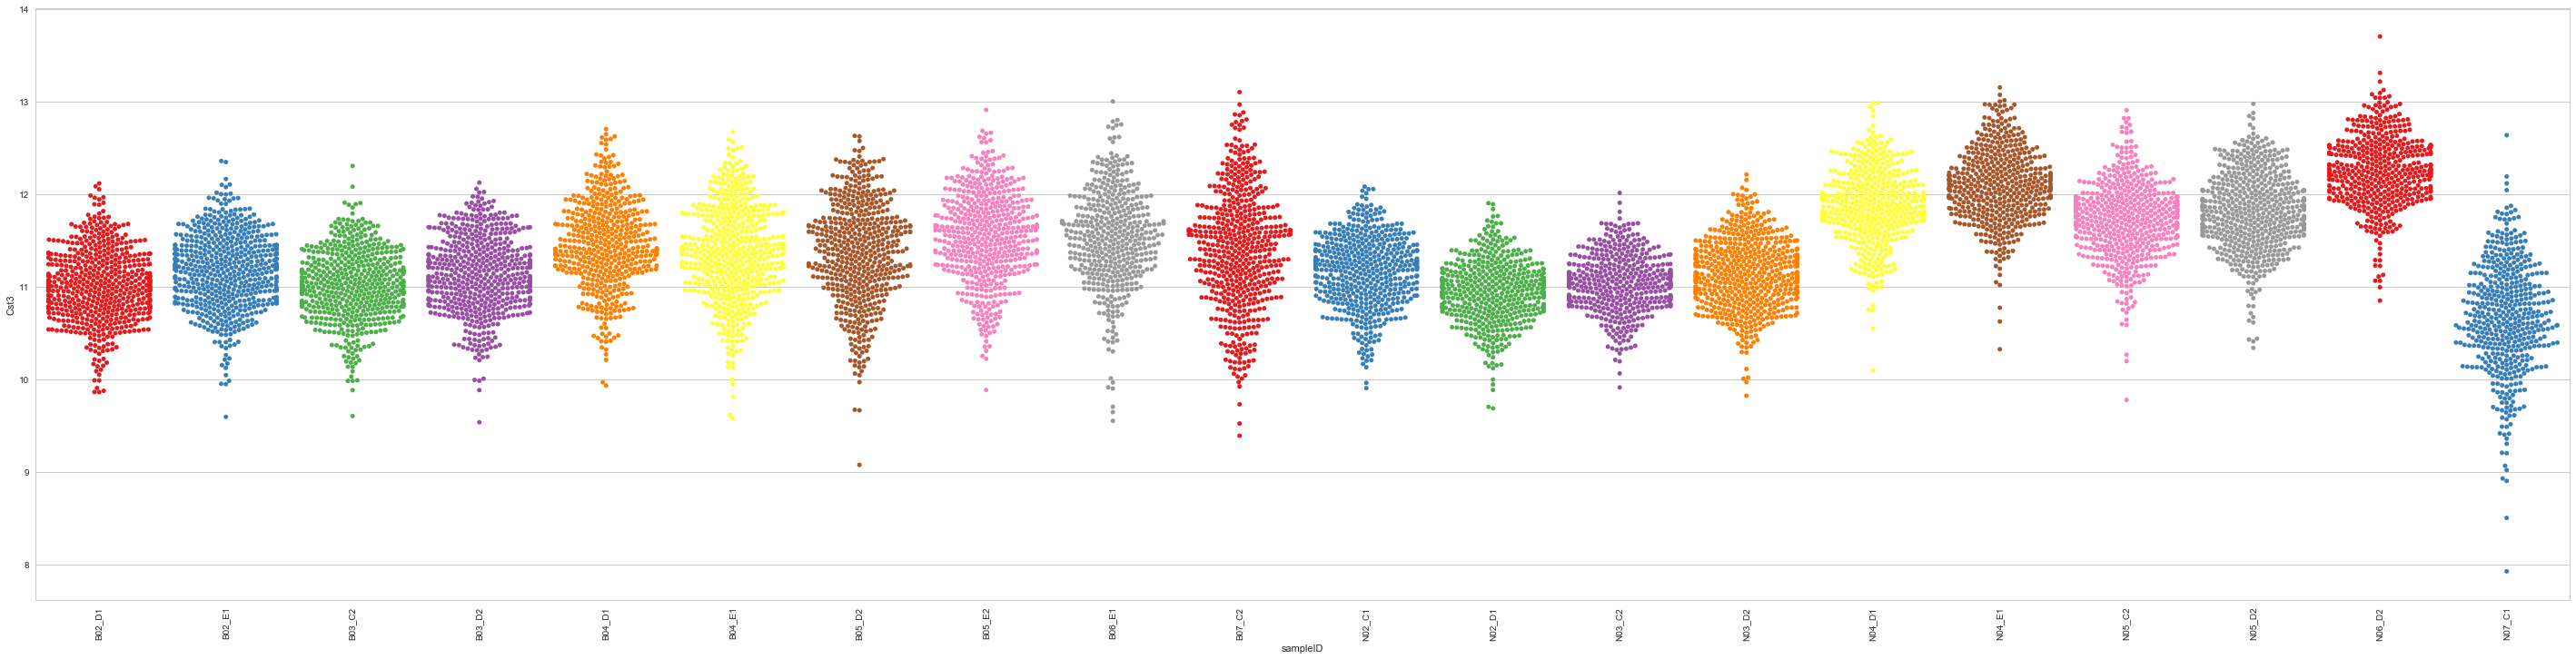

In [46]:
fig, ax = plt.subplots(figsize=(50, 12))

gene = genes_large_min[0]
data = lcpm_T[['sampleID', gene]]
g = sns.swarmplot(data=data, x='sampleID', y=gene, palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

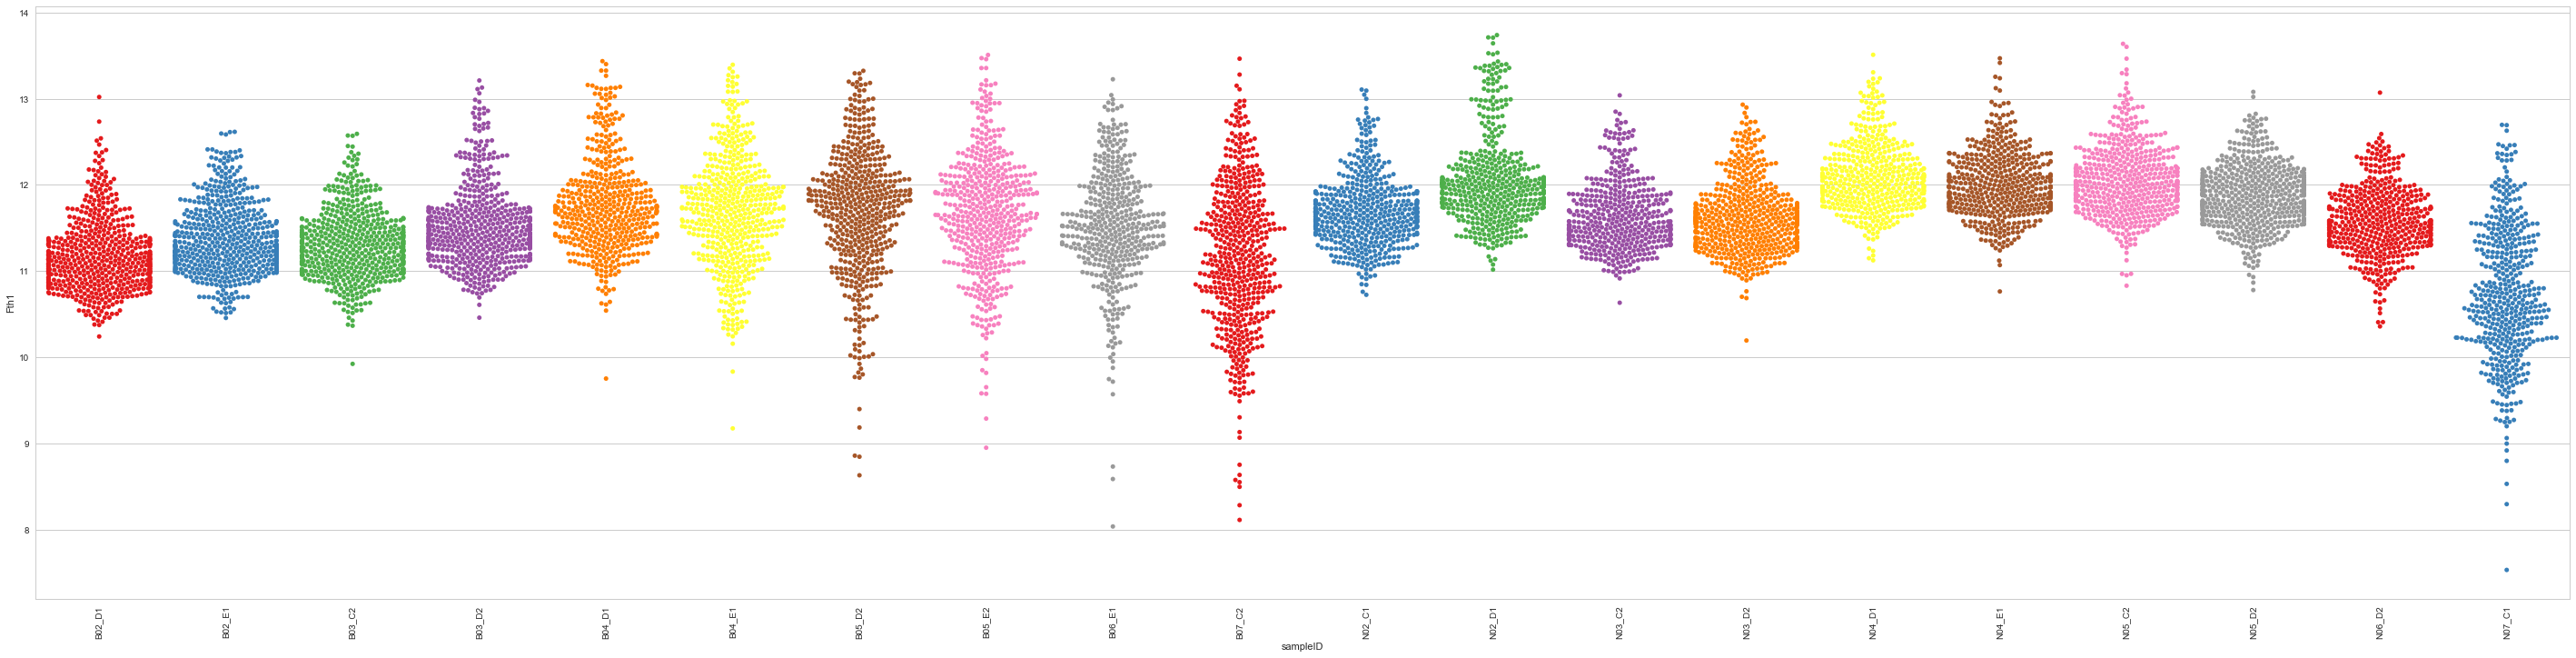

In [47]:
fig, ax = plt.subplots(figsize=(50, 12))

gene = genes_large_min[1]
data = lcpm_T[['sampleID', gene]]
g = sns.swarmplot(data=data, x='sampleID', y=gene, palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

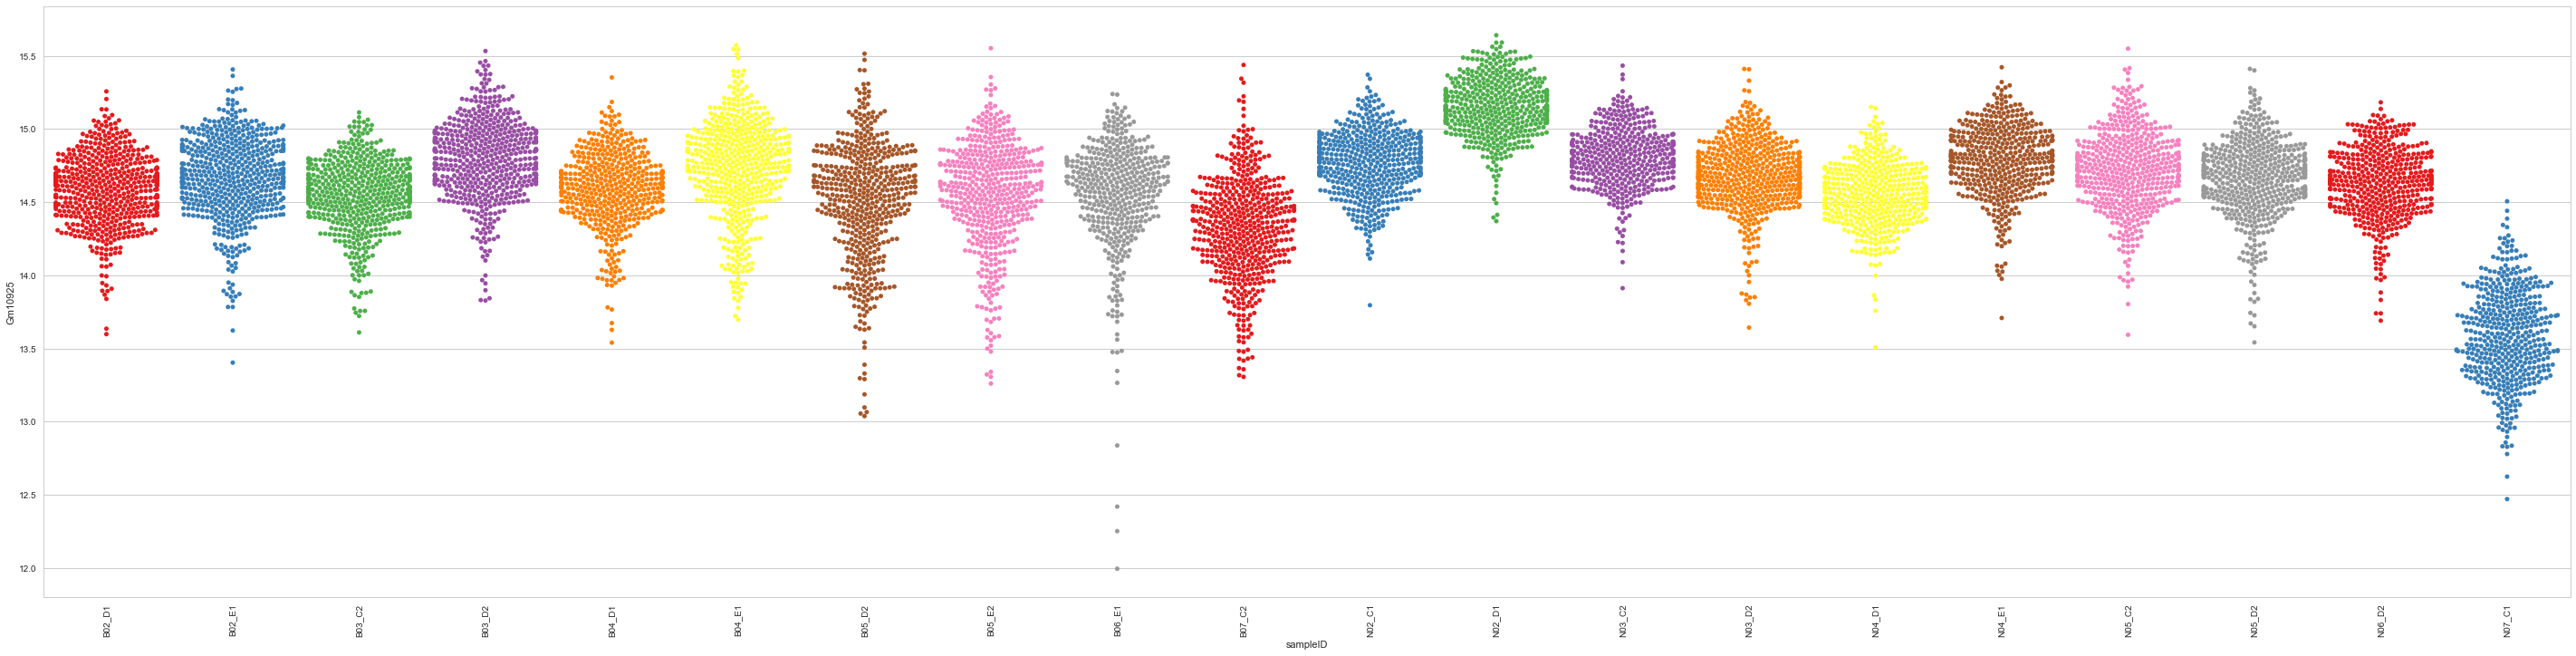

In [48]:
fig, ax = plt.subplots(figsize=(50, 12))

gene = genes_large_min[2]
data = lcpm_T[['sampleID', gene]]
g = sns.swarmplot(data=data, x='sampleID', y=gene, palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

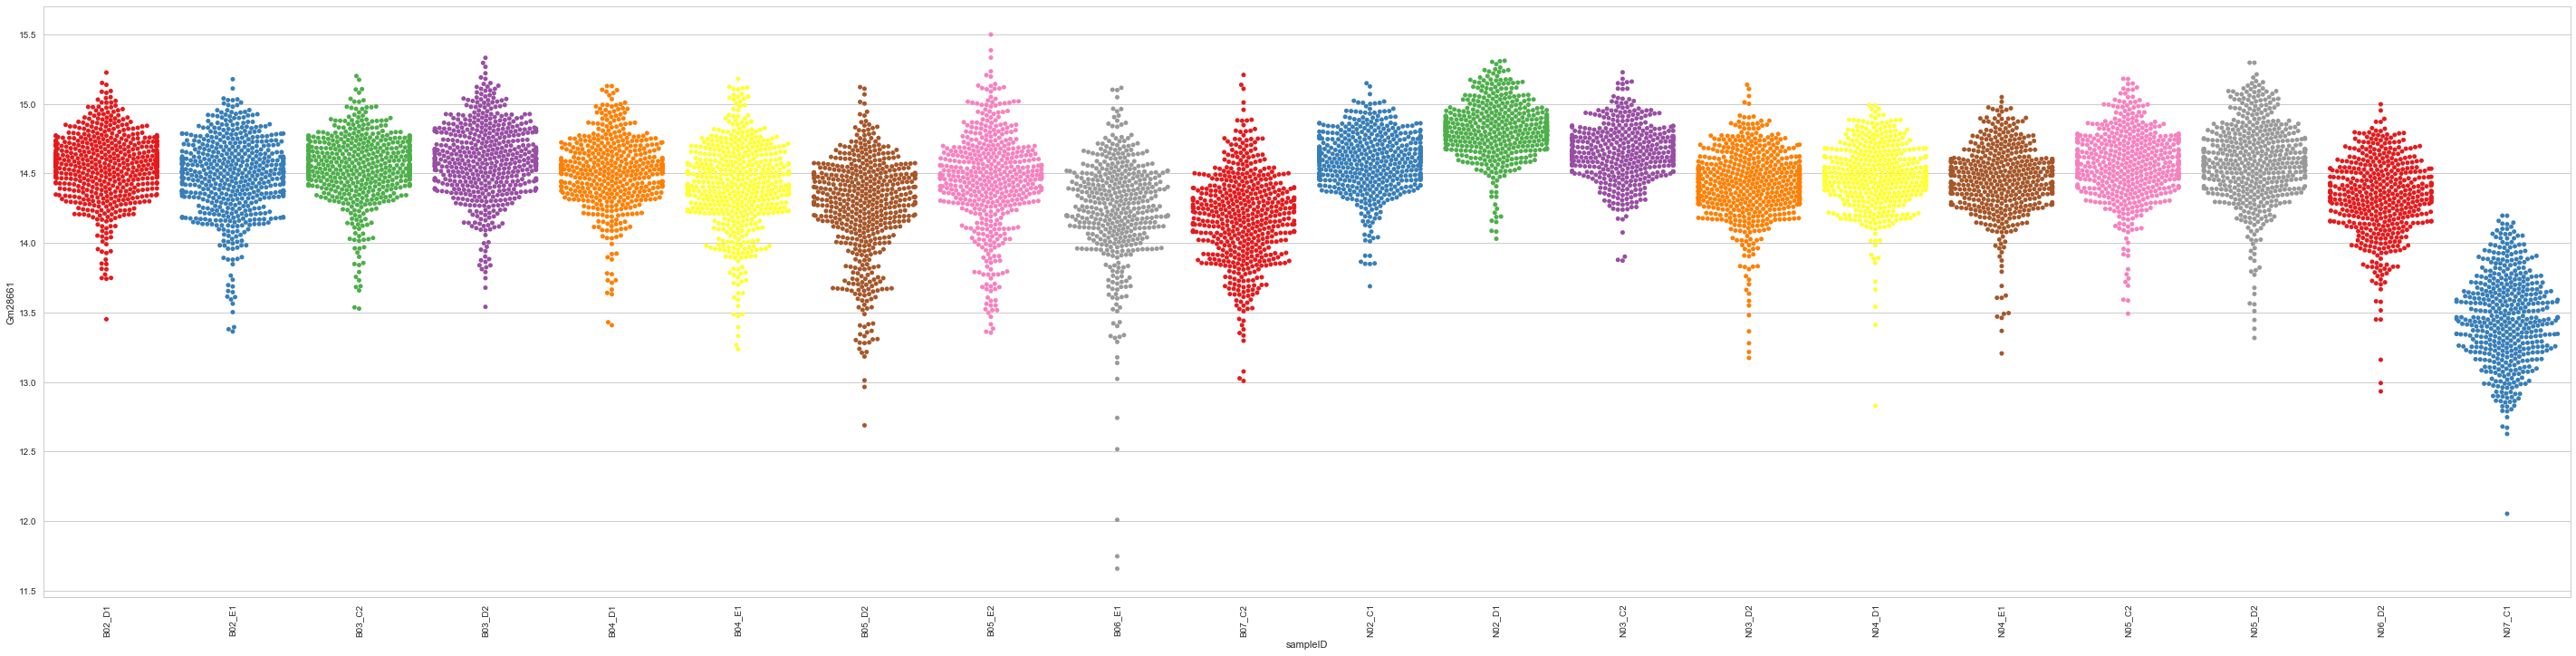

In [49]:
fig, ax = plt.subplots(figsize=(50, 12))

gene = genes_large_min[8]
data = lcpm_T[['sampleID', gene]]
g = sns.swarmplot(data=data, x='sampleID', y=gene, palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

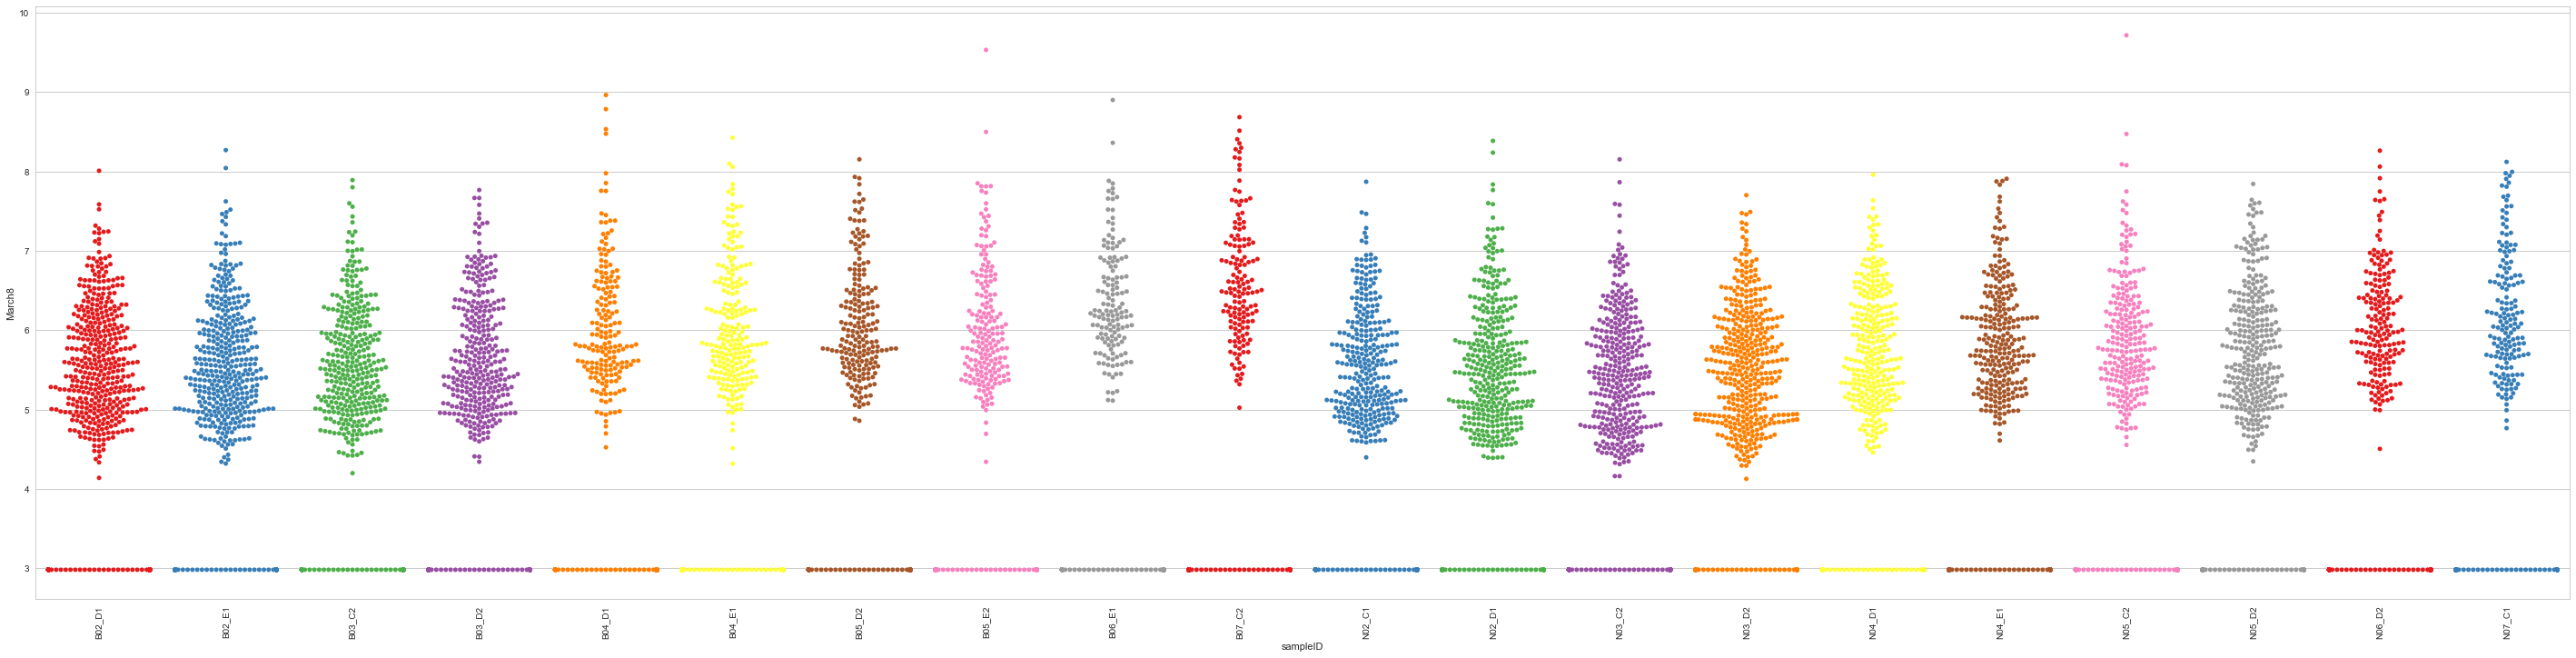

In [31]:
fig, ax = plt.subplots(figsize=(50, 12))

gene = 'March8'
g = sns.swarmplot(data=data, x='sampleID', y='March8', palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

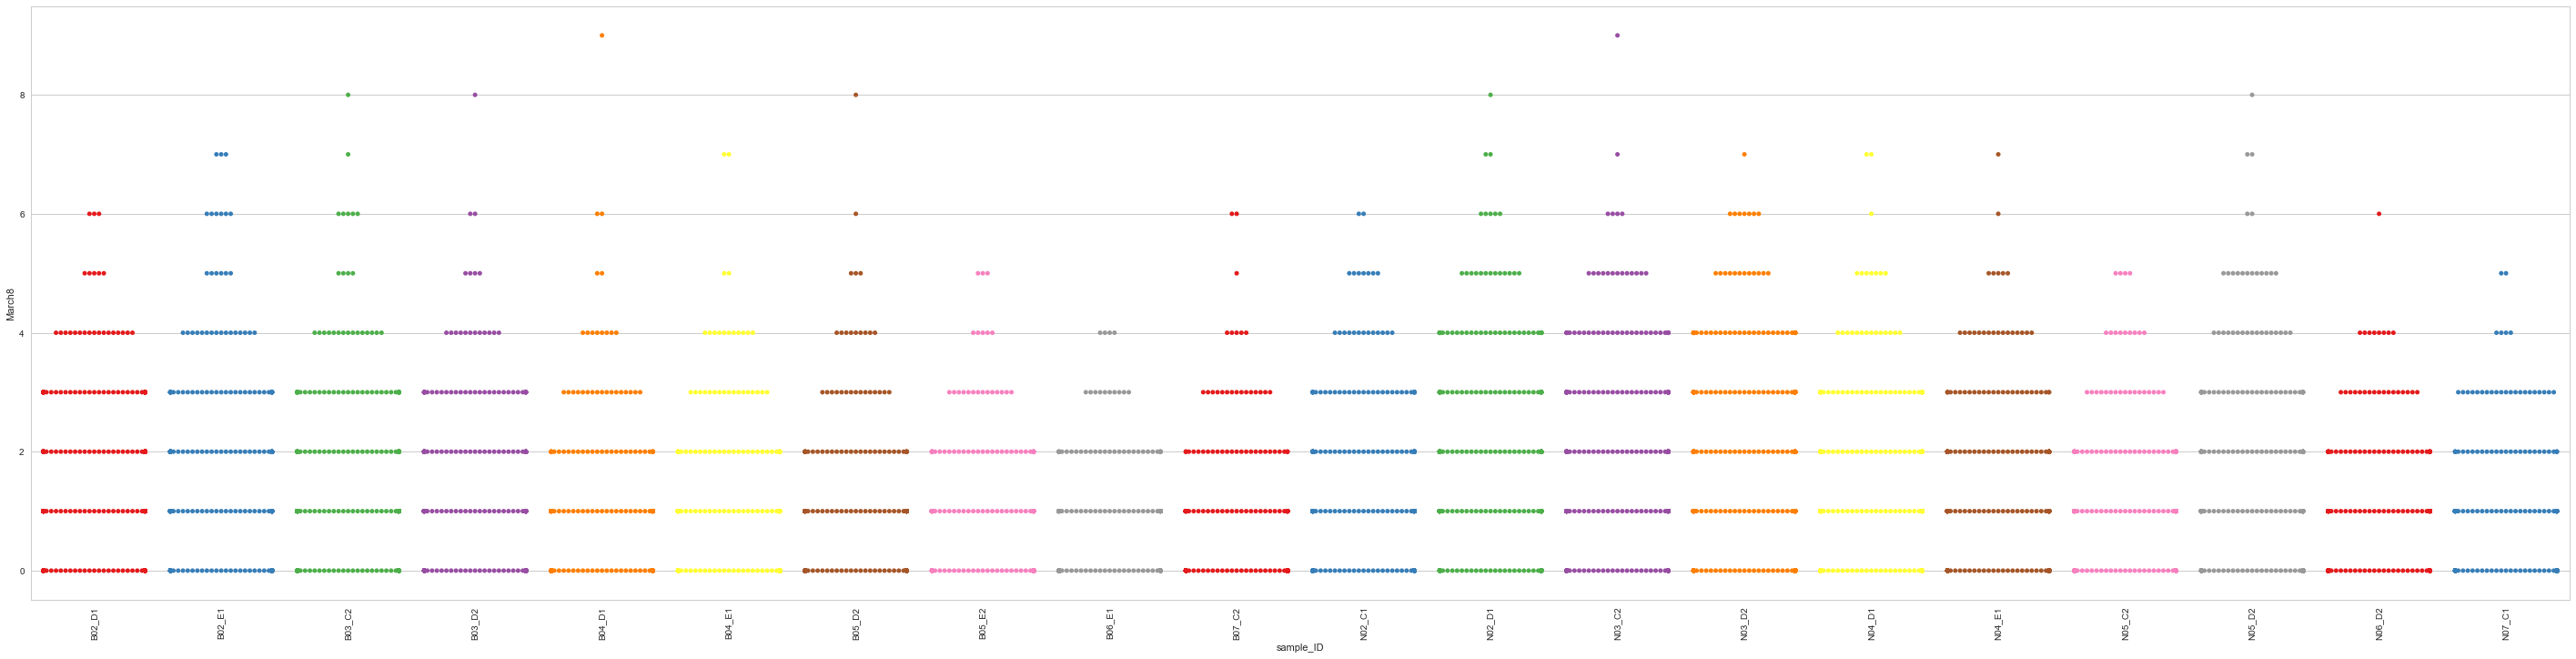

In [93]:
fig, ax = plt.subplots(figsize=(50, 12))

gene = 'March8'
df = dat[['sample_ID', 'March8']]
g = sns.swarmplot(data=df, x='sample_ID', y='March8', palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler1 = StandardScaler()
scaler2 = StandardScaler(with_mean=False)

In [56]:
acc = []
for slide in slides:
    slide_data = data[data['sampleID'] == slide].copy()
    slide_data['March8_std']         = scaler1.fit_transform(slide_data[['March8']])
    slide_data['March8_std_wo_mean'] = scaler2.fit_transform(slide_data[['March8']])
    
    acc.append(slide_data)    

In [59]:
df = pd.concat(acc)

In [61]:
df.head()

sampleID    March8  March8_std  March8_std_wo_mean
B02_D1__11_2   B02_D1  2.982974   -1.404801            2.226111
B02_D1__27_2   B02_D1  4.863966   -0.001069            3.629843
B02_D1__26_2   B02_D1  4.967879    0.076478            3.707389
B02_D1__30_2   B02_D1  4.715936   -0.111540            3.519372
B02_D1__12_2   B02_D1  4.828445   -0.027577            3.603334

In [35]:
data_std = StandardScaler().fit_transform(data[['March8']])

In [49]:
data_std_wo_mean = StandardScaler(with_mean=False).fit_transform(data[['March8']])

In [50]:
data_std_wo_mean

array([[ 4.40062656],
       [ 1.96339749],
       [ 1.96339749],
       ..., 
       [ 1.96339749],
       [ 1.96339749],
       [ 1.96339749]])

In [38]:
data['March8_std'] = data_std

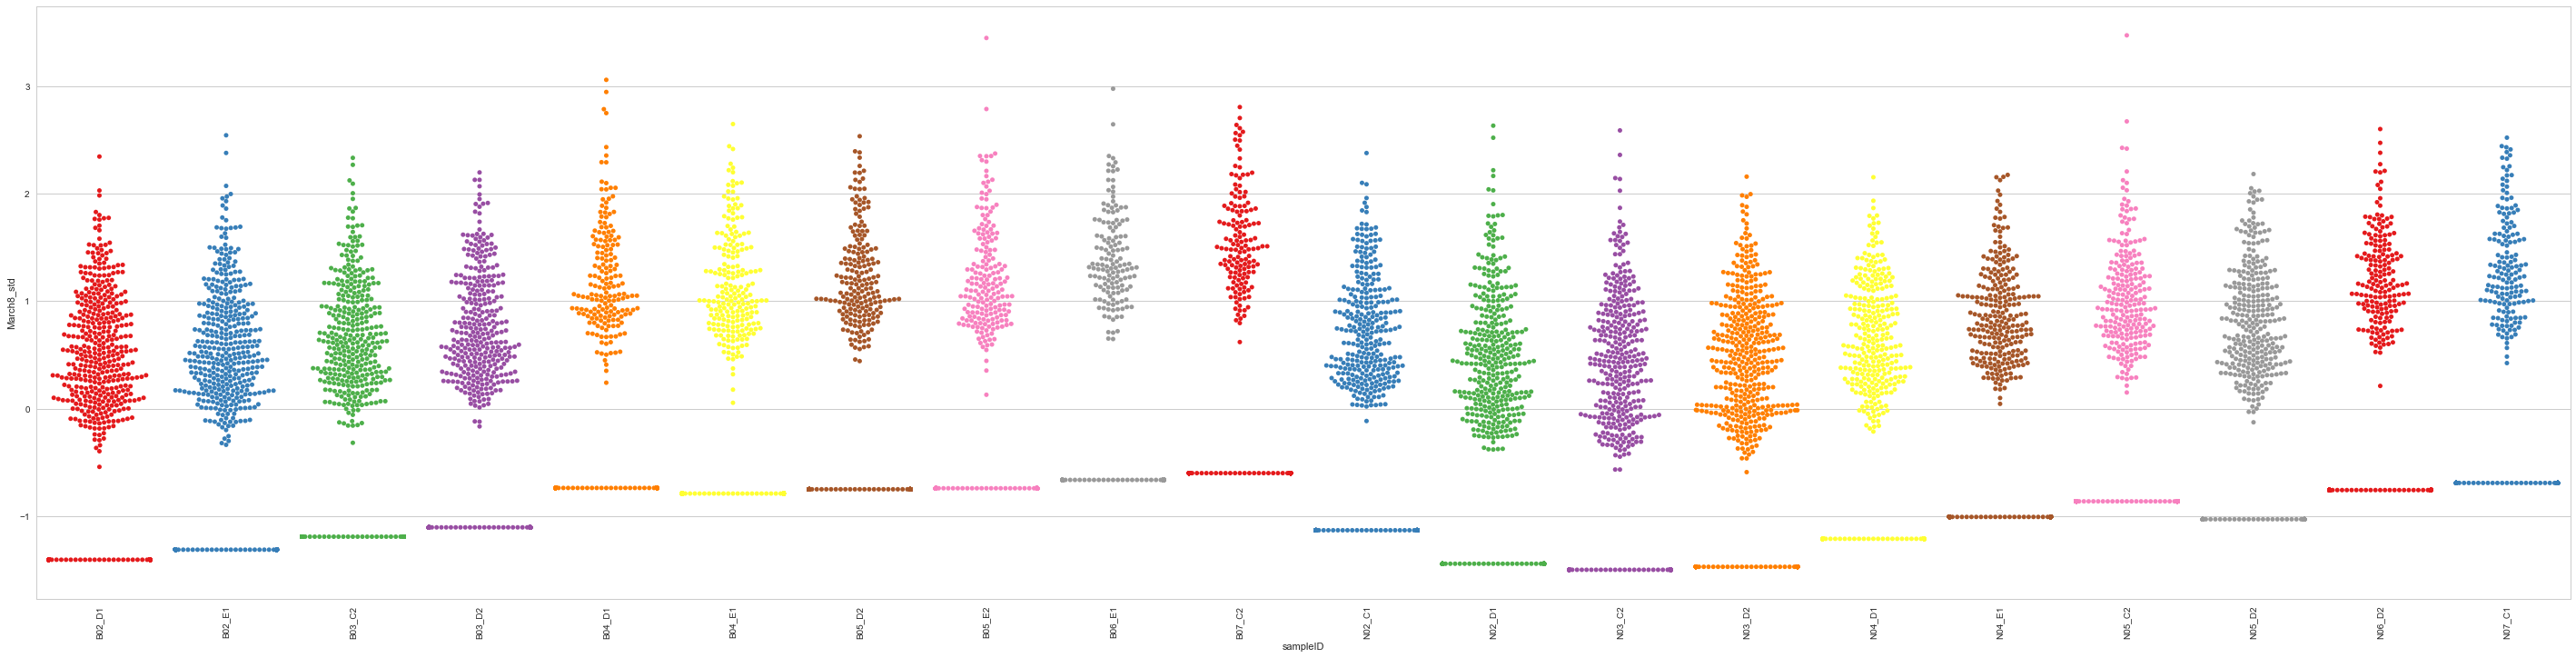

In [62]:
fig, ax = plt.subplots(figsize=(50, 12))

g = sns.swarmplot(data=df, x='sampleID', y='March8_std', palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()

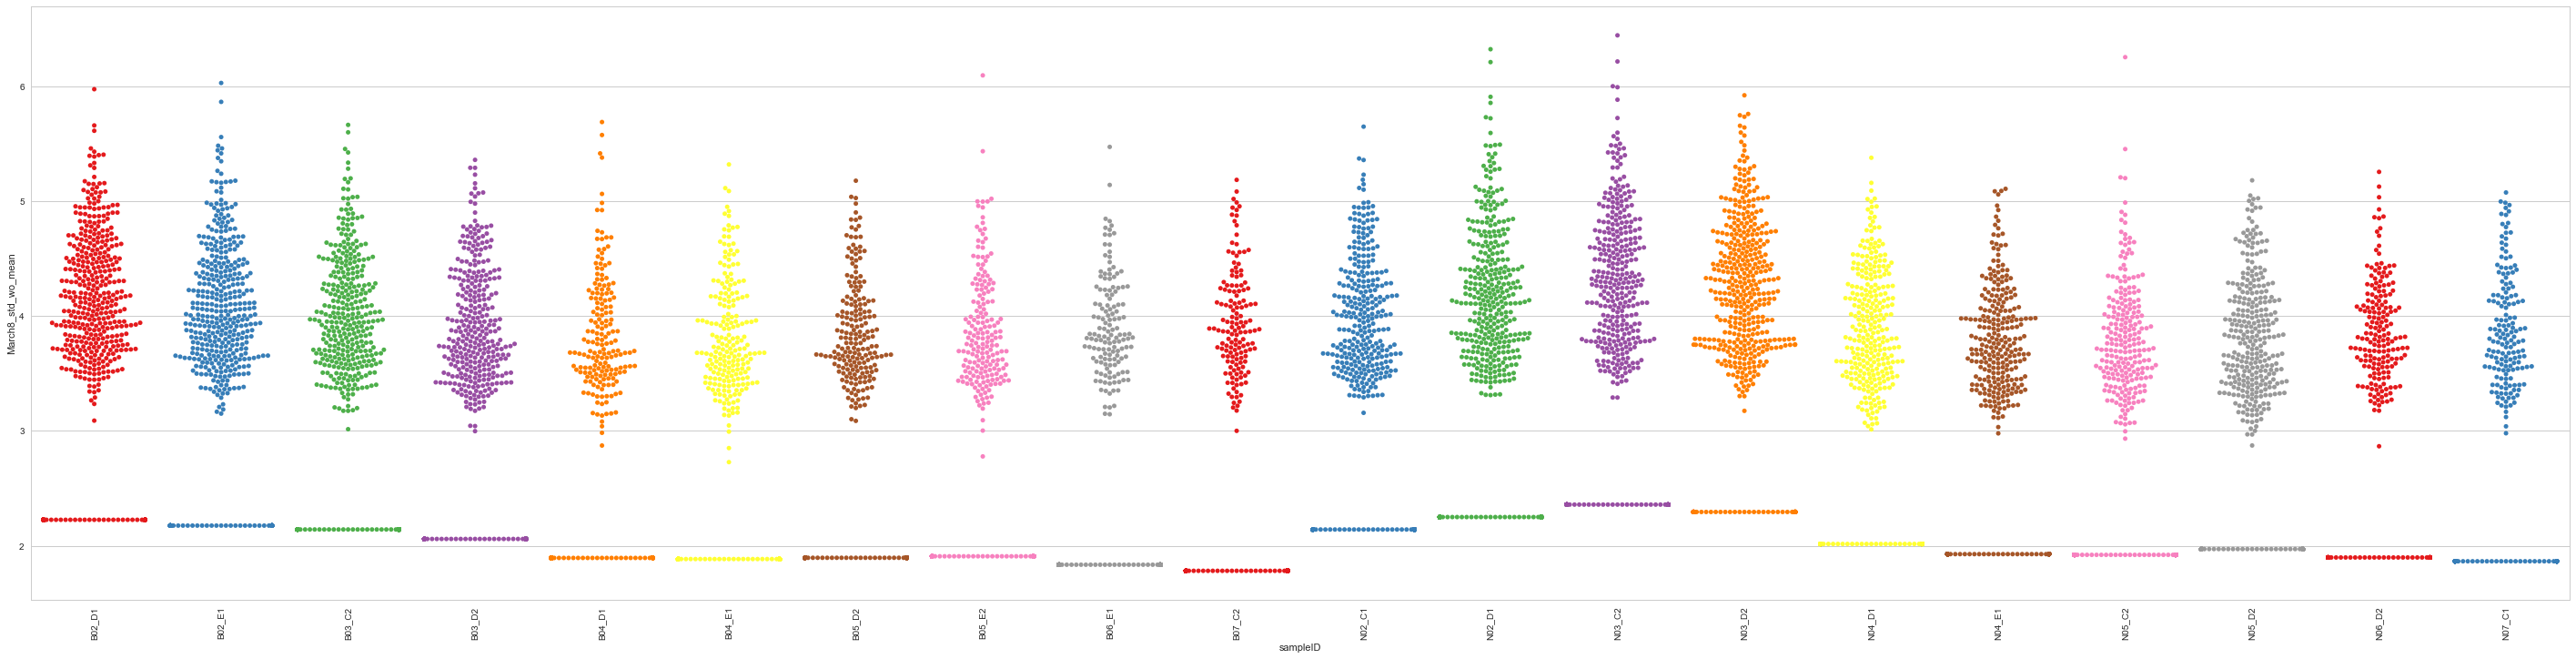

In [63]:
fig, ax = plt.subplots(figsize=(50, 12))

g = sns.swarmplot(data=df, x='sampleID', y='March8_std_wo_mean', palette="Set1", order=slides)
g.set_xticklabels(rotation=90, labels=slides)

plt.show()